In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/lithium_pro/lith_cost.csv')
data.head()

,Category,Output,Type,material,Year,Recycling Throughput,Cathode Scenario,Location scenario,Location of recycling
0,Cost of recycled materials to be made into cat...,5.613333,Pyro,All recycled chemistry,2020,10000,1,1,U.S.
1,Cost of recycled materials to be made into cat...,5.118174,Hydro,All recycled chemistry,2020,10000,1,1,U.S.
2,Cost of recycled materials to be made into cat...,7.451508,Direct,All recycled chemistry,2020,10000,1,1,U.S.
3,Cost of collection and transportation,1.743725,All,All recycled chemistry,2020,10000,1,1,U.S.
4,Cost of dissassembly - to module,1.323373,All,All recycled chemistry,2020,10000,1,1,U.S.


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/lithium_pro/lith_cost.csv')

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each column separately
data['Category'] = label_encoder.fit_transform(data['Category'])
data['material'] = label_encoder.fit_transform(data['material'])

# Save the modified data to a new file
data.to_csv('/content/drive/MyDrive/lithium_pro/lith_cost1.csv', index=False)

# Display the first few rows of the updated dataset
data.head()


,Category,Output,Type,material,Year,Recycling Throughput,Cathode Scenario,Location scenario,Location of recycling
0,4,5.613333,Pyro,0,2020,10000,1,1,U.S.
1,4,5.118174,Hydro,0,2020,10000,1,1,U.S.
2,4,7.451508,Direct,0,2020,10000,1,1,U.S.
3,0,1.743725,All,0,2020,10000,1,1,U.S.
4,2,1.323373,All,0,2020,10000,1,1,U.S.


In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/lithium_pro/lith_cost1.csv')

# Apply one-hot encoding to the specified columns and ensure they are encoded as 1s and 0s
data = pd.get_dummies(data, columns=['Type', 'Location of recycling'], drop_first=False)

# Save the modified data to a new file
data.to_csv('/content/drive/MyDrive/lithium_pro/lith_cost2.csv', index=False)

# Display the first few rows of the updated dataset
data.head()


,Category,Output,material,Year,Recycling Throughput,Cathode Scenario,Location scenario,Type_All,Type_Direct,Type_Hydro,Type_Pyro,Location of recycling_China,Location of recycling_U.S.
0,4,5.613333,0,2020,10000,1,1,False,False,False,True,False,True
1,4,5.118174,0,2020,10000,1,1,False,False,True,False,False,True
2,4,7.451508,0,2020,10000,1,1,False,True,False,False,False,True
3,0,1.743725,0,2020,10000,1,1,True,False,False,False,False,True
4,2,1.323373,0,2020,10000,1,1,True,False,False,False,False,True


In [6]:
data

,Category,Output,material,Year,Recycling Throughput,Cathode Scenario,Location scenario,Type_All,Type_Direct,Type_Hydro,Type_Pyro,Location of recycling_China,Location of recycling_U.S.
0,4,5.613333,0,2020,10000,1,1,False,False,False,True,False,True
1,4,5.118174,0,2020,10000,1,1,False,False,True,False,False,True
2,4,7.451508,0,2020,10000,1,1,False,True,False,False,False,True
3,0,1.743725,0,2020,10000,1,1,True,False,False,False,False,True
4,2,1.323373,0,2020,10000,1,1,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294247,7,0.602531,3,2050,9000,2,3,True,False,False,False,True,False
294248,7,0.004931,19,2050,9000,2,3,True,False,False,False,True,False
294249,7,485.609524,5,2050,9000,2,3,True,False,False,False,True,False
294250,7,487.370285,6,2050,9000,2,3,True,False,False,False,True,False


In [7]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/lithium_pro/lith_cost2.csv')

# Identify numerical columns for outlier detection
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the IQR for each numerical column
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows where any value in the numerical columns is outside the IQR bounds
data_cleaned = data[~((data[numerical_cols] < lower_bound) | (data[numerical_cols] > upper_bound)).any(axis=1)]

# Save the cleaned data to a new file
data_cleaned.to_csv('/content/drive/MyDrive/lithium_pro/lith_cost3.csv', index=False)

# Display the first few rows of the cleaned dataset
data_cleaned.head()


,Category,Output,material,Year,Recycling Throughput,Cathode Scenario,Location scenario,Type_All,Type_Direct,Type_Hydro,Type_Pyro,Location of recycling_China,Location of recycling_U.S.
7,5,2.546235,0,2020,10000,1,1,False,False,False,True,False,True
8,5,2.051076,0,2020,10000,1,1,False,False,True,False,False,True
9,5,3.488244,0,2020,10000,1,1,False,True,False,False,False,True
30,8,0.099729,9,2020,10000,1,1,False,False,False,True,False,True
31,8,0.327106,27,2020,10000,1,1,False,False,False,True,False,True


In [8]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/lithium_pro/lith_cost3.csv')

# Replace all True with 1 and False with 0
data = data.replace({True: 1, False: 0})

# Save the modified data to a new file
data.to_csv('/content/drive/MyDrive/lithium_pro/lith_cost4.csv', index=False)

# Display the first few rows of the updated dataset
data.head()


<ipython-input-8-462ea7b7d707>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


,Category,Output,material,Year,Recycling Throughput,Cathode Scenario,Location scenario,Type_All,Type_Direct,Type_Hydro,Type_Pyro,Location of recycling_China,Location of recycling_U.S.
0,5,2.546235,0,2020,10000,1,1,0,0,0,1,0,1
1,5,2.051076,0,2020,10000,1,1,0,0,1,0,0,1
2,5,3.488244,0,2020,10000,1,1,0,1,0,0,0,1
3,8,0.099729,9,2020,10000,1,1,0,0,0,1,0,1
4,8,0.327106,27,2020,10000,1,1,0,0,0,1,0,1


In [9]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/lithium_pro/lith_cost4.csv')
data.head()

,Category,Output,material,Year,Recycling Throughput,Cathode Scenario,Location scenario,Type_All,Type_Direct,Type_Hydro,Type_Pyro,Location of recycling_China,Location of recycling_U.S.
0,5,2.546235,0,2020,10000,1,1,0,0,0,1,0,1
1,5,2.051076,0,2020,10000,1,1,0,0,1,0,0,1
2,5,3.488244,0,2020,10000,1,1,0,1,0,0,0,1
3,8,0.099729,9,2020,10000,1,1,0,0,0,1,0,1
4,8,0.327106,27,2020,10000,1,1,0,0,0,1,0,1


In [10]:
data

,Category,Output,material,Year,Recycling Throughput,Cathode Scenario,Location scenario,Type_All,Type_Direct,Type_Hydro,Type_Pyro,Location of recycling_China,Location of recycling_U.S.
0,5,2.546235,0,2020,10000,1,1,0,0,0,1,0,1
1,5,2.051076,0,2020,10000,1,1,0,0,1,0,0,1
2,5,3.488244,0,2020,10000,1,1,0,1,0,0,0,1
3,8,0.099729,9,2020,10000,1,1,0,0,0,1,0,1
4,8,0.327106,27,2020,10000,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166279,7,2.601913,33,2050,9000,2,3,1,0,0,0,1,0
166280,7,0.046309,2,2050,9000,2,3,1,0,0,0,1,0
166281,7,0.118632,28,2050,9000,2,3,1,0,0,0,1,0
166282,7,0.602531,3,2050,9000,2,3,1,0,0,0,1,0


Feature Importance Scores (PCA-IG mapped to original features):
Recycling Throughput           6.417708
Category                       6.322921
Type_Pyro                      5.612451
Type_Direct                    2.863190
Location of recycling_China    2.826638
Location of recycling_U.S.     2.826638
Location scenario              2.690714
Cathode Scenario               2.373260
Type_Hydro                     1.970080
Year                           1.766049
material                       1.111236
Type_All                       0.970906
dtype: float64


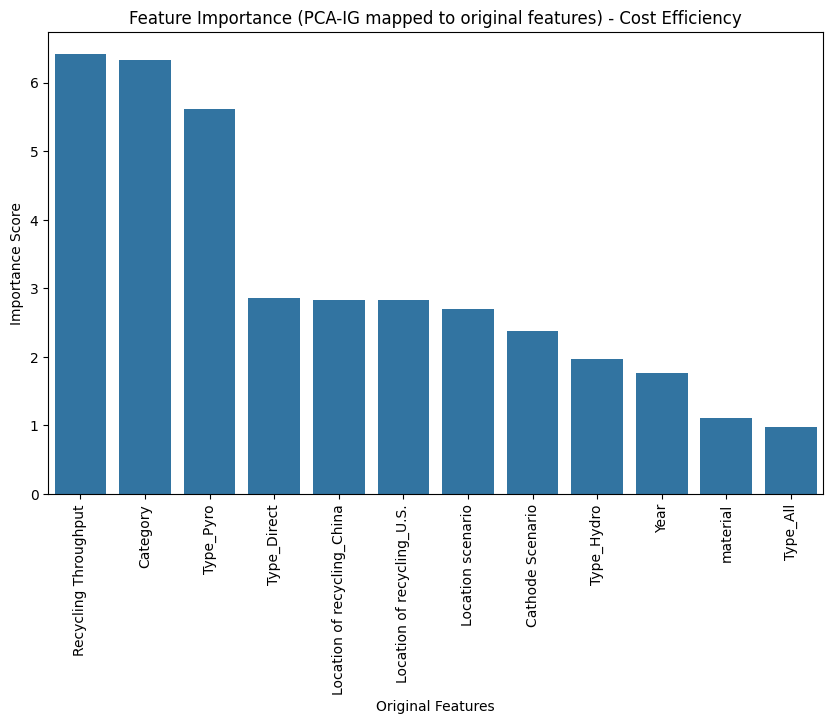


Selected Features (Threshold-Based Selection):
Recycling Throughput           6.417708
Category                       6.322921
Type_Pyro                      5.612451
Type_Direct                    2.863190
Location of recycling_China    2.826638
Location of recycling_U.S.     2.826638
Location scenario              2.690714
Cathode Scenario               2.373260
Type_Hydro                     1.970080
Year                           1.766049
material                       1.111236
Type_All                       0.970906
dtype: float64

Selected Top-10 Features:
Recycling Throughput           6.417708
Category                       6.322921
Type_Pyro                      5.612451
Type_Direct                    2.863190
Location of recycling_China    2.826638
Location of recycling_U.S.     2.826638
Location scenario              2.690714
Cathode Scenario               2.373260
Type_Hydro                     1.970080
Year                           1.766049
dtype: float64

Selected Featu

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score, KFold  # Use KFold for regression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/lithium_pro/lith_cost4.csv')

# Split features and target
X = data.drop('Output', axis=1)
y = data['Output']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Evaluate the importance of principal components using mutual information (for regression)
mi = mutual_info_regression(X_pca, y)
pc_importance = pd.Series(mi, index=[f'PC{i+1}' for i in range(X_pca.shape[1])]).sort_values(ascending=False)

# Get the loadings (components)
loadings = pca.components_

# Calculate the importance of the original features using PCA-IG
pca_ig_importance = np.abs(np.dot(loadings.T, mi))
pca_ig_importance_series = pd.Series(pca_ig_importance, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores using PCA-IG
print("Feature Importance Scores (PCA-IG mapped to original features):")
print(pca_ig_importance_series)

# Plot the feature importance using PCA-IG
plt.figure(figsize=(10, 6))
sns.barplot(x=pca_ig_importance_series.index, y=pca_ig_importance_series.values)
plt.title('Feature Importance (PCA-IG mapped to original features) - Cost Efficiency')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Cross-validation for feature importance evaluation
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Use KFold instead of StratifiedKFold

# Threshold-Based Selection
threshold = 0.002
original_feature_importance_series = pca_ig_importance_series  # Assuming you use pca_ig_importance_series
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.90
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)

# Evaluate cross-validated feature importance for selected features
def evaluate_feature_importance_cv(X, y, cv):
    def cross_val_feature_importance(model, X, y, cv):
        scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')  # Use negative MSE for regression
        return np.mean(scores)

    # Example: Select top features based on some selection method (threshold, top_n, cumulative)
    selected_features = selected_features_threshold.index  # Replace with selected features based on method

    # Example: Evaluate feature importance using a regressor (e.g., RandomForestRegressor)
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(random_state=42)
    feature_importance_scores = {}

    for feature in selected_features:
        X_feature = X[feature].values.reshape(-1, 1)
        score = cross_val_feature_importance(model, X_feature, y, cv)
        feature_importance_scores[feature] = score

    return feature_importance_scores

# Example usage:
feature_importance_scores = evaluate_feature_importance_cv(X, y, cv)
print("\nCross-validated Feature Importance Scores:")
print(feature_importance_scores)


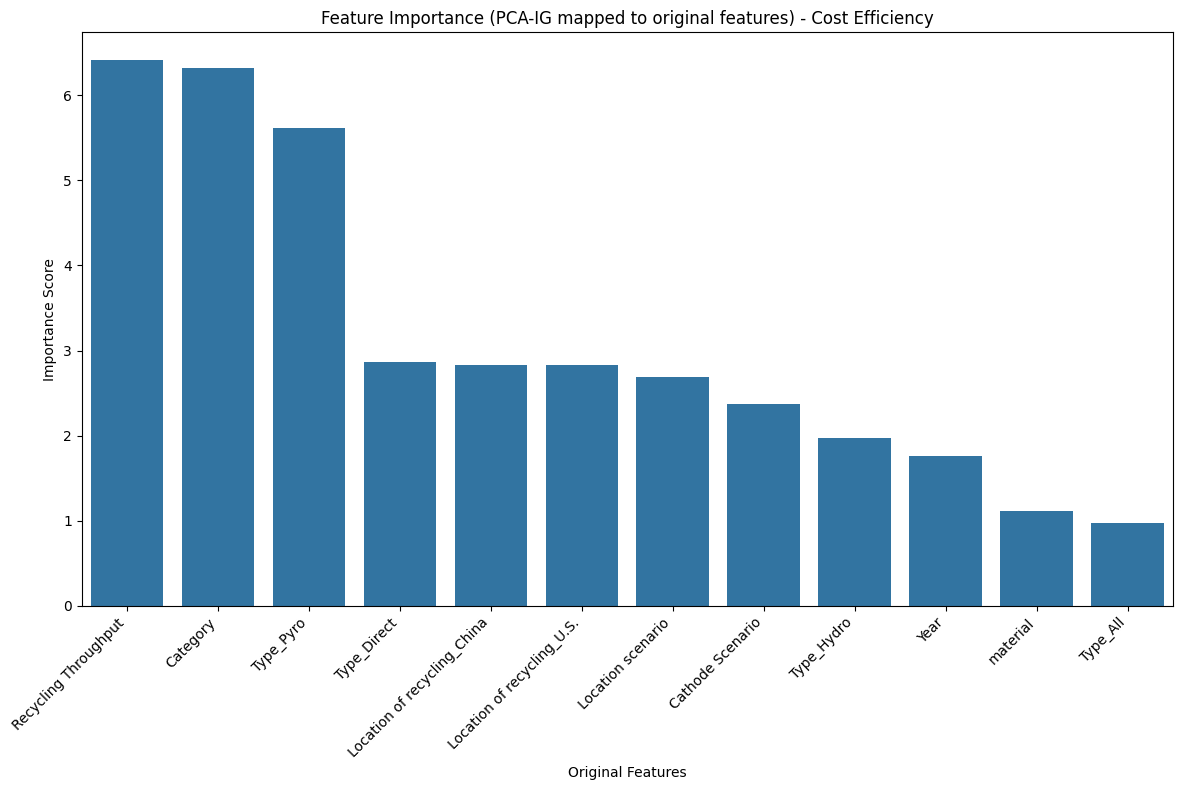

In [12]:
# Plot the feature importance using PCA-IG
plt.figure(figsize=(12, 8))  # Increase the figure size if needed
sns.barplot(x=pca_ig_importance_series.index, y=pca_ig_importance_series.values)
plt.title('Feature Importance (PCA-IG mapped to original features) - Cost Efficiency')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')  # Rotate feature names by 45 degrees and align them to the right

# Use tight_layout to avoid cutting off labels
plt.tight_layout()

# Save the plot as a PDF with 600 dpi
plt.savefig('/content/drive/MyDrive/lithium_pro/feature_importance_cost_plot.pdf', dpi=700)

# Show the plot
plt.show()
